In [10]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 10]

font = {'size'   : 15, }
axes = {'labelsize': 'large', 'titlesize': 'large'}

mpl.rc('font', **font)
mpl.rc('axes', **axes)

import pandas as pd
import data_utils

In [2]:
# Paths to data csvs
wd = "/home/behzad/Documents/barnes_lab/cplusplus_software/speed_test/repressilator/cpp"
data_dir = wd + "/output/two_species_stable_0/Population_0"
distances_path = data_dir + "/distances.csv"
eigenvalues_path = data_dir + "/eigenvalues_do_fsolve_state.csv"
model_space_report_path = data_dir + "/model_space_report.csv"
adj_mat_dir = "/home/behzad/Documents/barnes_lab/sympy_consortium_framework/output/two_species_no_symm/adj_matricies/model_#REF#_adj_mat.csv"


In [3]:
# Load dataframes
distances_df = pd.read_csv(distances_path)
eigenvalues_df = pd.read_csv(eigenvalues_path)
model_space_report_df = pd.read_csv(model_space_report_path)

# Make distances numeric
distances_df = data_utils.distances_pre_processing(distances_df)

In [16]:
# Join eigenvalues and distances on the simulation index, batch number and model_ref

all_neg_eig = data_utils.all_negative_eigs(eigenvalues_df)
all_real_eig = data_utils.all_real_eigs(eigenvalues_df)
all_zero_eig = data_utils.all_zero_eigs(eigenvalues_df)

eigenvalues_df['all_neg_eig'] = all_neg_eig
eigenvalues_df['all_real_eig'] = all_real_eig
eigenvalues_df['all_zero_eig'] = all_zero_eig

positive_loops, negative_loops = data_utils.make_feedback_loop_counts(model_space_report_df, adj_mat_dir)
model_space_report_df['pos_loop_count'] = positive_loops
model_space_report_df['neg_loop_count'] = negative_loops

loop_ratios = []
for x, y in zip(negative_loops, positive_loops):
    try:
        loop_ratios.append(x/y)
    
    except(ZeroDivisionError):
        loop_ratios.append(np.nan)
        
        

model_space_report_df['loop_count_ratio'] = loop_ratios

Index(['eig_0_real', 'eig_1_real', 'eig_2_real', 'eig_3_real', 'eig_4_real',
       'eig_5_real', 'eig_6_real', 'eig_7_real', 'eig_8_real', 'eig_9_real',
       'all_real_eig'],
      dtype='object')
  Unnamed: 0  N_x  N_c  B_mccV  B_mccB  A_1  A_2
0        N_x  0.0  0.0    -1.0    -1.0  0.0  0.0
1        N_c  0.0  0.0    -1.0    -1.0  0.0  0.0
2     B_mccV  1.0  0.0     0.0     0.0  1.0  0.0
3     B_mccB  0.0  1.0     0.0     0.0  0.0  1.0
4        A_1  1.0  1.0     0.0     0.0  0.0  0.0
5        A_2  1.0  1.0     0.0     0.0  0.0  0.0
[0, 2, 0]
[0, 4, 2, 0]
[0, 5, 3, 0]
[1, 3, 0, 2, 1]
[1, 4, 2, 0, 5, 3, 1]
[1, 5, 3, 0, 2, 1]
  Unnamed: 0  N_x  N_c  B_mccV  B_mccB  A_1  A_2
0        N_x  0.0  0.0    -1.0    -1.0  0.0  0.0
1        N_c  0.0  0.0     0.0    -1.0  0.0  0.0
2     B_mccV  1.0  0.0     0.0     0.0  1.0  0.0
3     B_mccB  0.0  1.0     0.0     0.0  0.0  1.0
4        A_1  1.0  1.0     0.0     0.0  0.0  0.0
5        A_2  1.0  1.0     0.0     0.0  0.0  0.0
[0, 2, 0]
[0, 4, 2, 0

  Unnamed: 0  N_x  N_c  B_mccV  B_mccB  A_1  A_2
0        N_x  0.0  0.0    -1.0     0.0  0.0  0.0
1        N_c  0.0  0.0     0.0     0.0  0.0  0.0
2     B_mccV  1.0  1.0     0.0     0.0  1.0  0.0
3     B_mccB  0.0  0.0     0.0     0.0  0.0  0.0
4        A_1  1.0  0.0     0.0     0.0  0.0  0.0
5        A_2  0.0  0.0     0.0     0.0  0.0  0.0
[0, 2, 0]
[0, 4, 2, 0]
  Unnamed: 0  N_x  N_c  B_mccV  B_mccB  A_1  A_2
0        N_x  0.0  0.0    -1.0     0.0  0.0  0.0
1        N_c  0.0  0.0    -1.0    -1.0  0.0  0.0
2     B_mccV  1.0  0.0     0.0     0.0  1.0  0.0
3     B_mccB  0.0  1.0     0.0     0.0  1.0  0.0
4        A_1  1.0  1.0     0.0     0.0  0.0  0.0
5        A_2  0.0  0.0     0.0     0.0  0.0  0.0
[0, 2, 0]
[0, 4, 2, 0]
[1, 3, 1]
[1, 4, 2, 0, 1]
  Unnamed: 0  N_x  N_c  B_mccV  B_mccB  A_1  A_2
0        N_x  0.0  0.0    -1.0     0.0  0.0  0.0
1        N_c  0.0  0.0     0.0    -1.0  0.0  0.0
2     B_mccV  1.0  0.0     0.0     0.0  1.0  0.0
3     B_mccB  0.0  1.0     0.0     0.0  1.0  0

  Unnamed: 0  N_x  N_c  B_mccV  B_mccB  A_1  A_2
0        N_x  0.0  0.0     0.0    -1.0  0.0  0.0
1        N_c  0.0  0.0    -1.0     0.0  0.0  0.0
2     B_mccV  1.0  0.0     0.0     0.0  1.0  0.0
3     B_mccB  0.0  1.0     0.0     0.0  0.0  1.0
4        A_1  0.0  1.0     0.0     0.0  0.0  0.0
5        A_2  0.0  1.0     0.0     0.0  0.0  0.0
[0, 2, 1, 3, 0]
[1, 3, 0, 2, 1]
[1, 4, 2, 1]
[1, 5, 3, 0, 2, 1]
  Unnamed: 0  N_x  N_c  B_mccV  B_mccB  A_1  A_2
0        N_x  0.0  0.0    -1.0     0.0  0.0  0.0
1        N_c  0.0  0.0    -1.0    -1.0  0.0  0.0
2     B_mccV  1.0  0.0     0.0     0.0  1.0  0.0
3     B_mccB  0.0  1.0     0.0     0.0  1.0  0.0
4        A_1  0.0  1.0     0.0     0.0  0.0  0.0
5        A_2  0.0  0.0     0.0     0.0  0.0  0.0
[0, 2, 0]
[1, 3, 1]
[1, 4, 2, 0, 1]
  Unnamed: 0  N_x  N_c  B_mccV  B_mccB  A_1  A_2
0        N_x  0.0  0.0    -1.0     0.0  0.0  0.0
1        N_c  0.0  0.0     0.0    -1.0  0.0  0.0
2     B_mccV  1.0  0.0     0.0     0.0  1.0  0.0
3     B_mccB  0.0 

In [5]:
joint_df = pd.merge(left=eigenvalues_df, right=distances_df, how='inner', on=['sim_idx', 'batch_num', 'model_ref'])
joint_df.reset_index()

joint_df['sum_std'] = joint_df['d2'] + joint_df['d5']
# Set accepted or rejected particles
mask = (joint_df['d1'] == 0) & (joint_df['d2'] < 100) & (joint_df['d3'] > 1e4) & (joint_df['d4'] == 0) & (joint_df['d5'] < 100) & (joint_df['d6'] > 1e4)
joint_df.loc[mask, 'Accepted'] = True
joint_df.loc[~mask, 'Accepted'] = False

In [6]:
print(model_space_report_df.columns)
model_space_idx_list = model_space_report_df['model_idx'].values

for idx in model_space_idx_list:
    model_sub_df = joint_df.loc[joint_df['model_ref'] == idx]
    accepted_count = 0
    for row_idx, row in model_sub_df.iterrows():
        if row['Accepted']:
            accepted_count += 1
    
    model_space_report_df.loc[model_space_report_df['model_idx'] == idx, ['accepted_count']] = accepted_count

acceptance_ratios = []
for row_idx, row in model_space_report_df.iterrows():
    acceptance_ratios.append(row['accepted_count'] / row['simulated_count'])
    

model_space_report_df['acceptance_ratio'] = acceptance_ratios

Index(['Unnamed: 0', 'model_idx', 'accepted_count', 'simulated_count',
       'pos_loop_count', 'neg_loop_count', 'loop_count_ratio'],
      dtype='object')


### Simulations summary


In [7]:
all_sims = joint_df
full_term_sims = joint_df.loc[joint_df['integ_error'].isnull()]
early_termination_sims = joint_df.loc[~joint_df['integ_error'].isnull()]

accepted_sims = joint_df.loc[joint_df['Accepted'] == True]
rejected_sims = joint_df.loc[joint_df['Accepted'] == False]

# Total number of simulations
print("Total sims: ", len(all_sims))
print("Num accepted: ", len(accepted_sims))
print("Num rejected: ", len(rejected_sims))
print("")


Total sims:  49500
Num accepted:  7565
Num rejected:  41935



### Model success rates

Replicate:  0    Simulations:  16500
Replicate:  1    Simulations:  16500
Replicate:  2    Simulations:  16500


/home/behzad/Documents/barnes_lab/cplusplus_software/speed_test/repressilator/cpp/data_analsis_notebook/data_utils.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  model_space_report_df[replicate_name] = replicate_acceptance_ratios
/home/behzad/Documents/barnes_lab/cplusplus_software/speed_test/repressilator/cpp/data_analsis_notebook/data_utils.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  model_space_report_df['stdev'] = model_standard_deviations


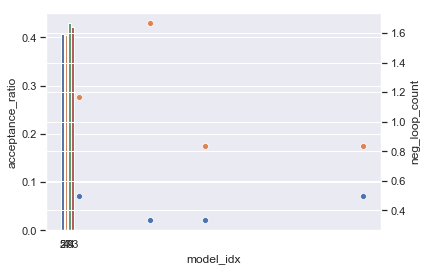

In [8]:

sub_model_report = model_space_report_df.loc[model_space_report_df['acceptance_ratio'] > 0.4]

# Add error bars
data_utils.generate_replicates_and_std(joint_df, sub_model_report, 3)

ax = sns.barplot(x='model_idx', y='acceptance_ratio', data=sub_model_report)
# ax.errorbar(model_space_report_df['model_idx'], sub_model_report['acceptance_ratio'], yerr=sub_model_report['stdev'], fmt=',')



ax2 = ax.twinx()
ax2 = sns.scatterplot(x = 'model_idx', y='pos_loop_count', data=sub_model_report)
ax2 = sns.scatterplot(x = 'model_idx', y='neg_loop_count', data=sub_model_report)
plt.show()

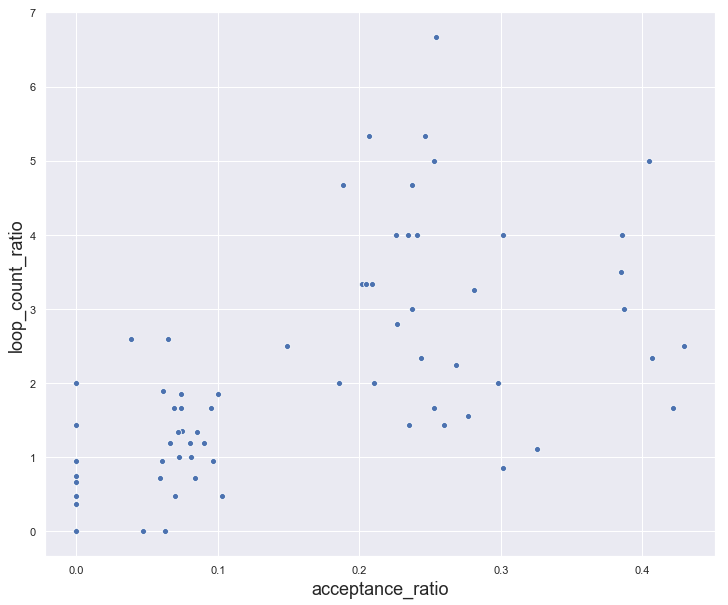

In [15]:
ax = sns.scatterplot(x='acceptance_ratio', y='loop_count_ratio', data=model_space_report_df)
